데이터 정의

- YM : 기준년월
- SIDO : 지역대분류명
- SIGUNGU : 지역중분류명
- FranClass : 소상공인구분
- Type : 업종명
- Time : 시간대
- TotalSpent : 총사용금액
- DisSpent : 재난지원금 사용금액
- NumOfSpent : 총 이용건수
- NumOfDisSpent : 총 재난지원금 이용건수
- POINT_X, POINT_Y : X,Y 좌표

- 영세	
연매출 3억 이하
- 중소	
5억이하
- 중소1	
10억이하
- 중소2	
30억이하
- 일반(대형)	
30억초과 

#### 재난지원금의 목적이 잘 실행되었는가?
재난지원금의 목적과 사용
- 자영업자, 소상공인, 저소득층, 실업자 등 취약계층의 타격으로 인한 재난지원금의 지급
- 신용·체크카드 포인트는 3월 29일 현재 주민등록상 거주지를 기준으로 광역 지자체 안에서만 쓸 수 있으며 ((예) 주소지가 경기도일 경우 서울에서 사용 불가)), 백화점·대형마트·온라인쇼핑몰·유흥업소 등에서는 사용할 수 없다.
- 추가로, 재난지원금의 사용은 코로나 방역과 충돌하면 안될 것이다. 

- 규모별 소비, 시간별 소비, 업종별 소비(술집의 경우 일반음식점)

#### 확진자 추이와 소비 형태

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df1 = pd.read_csv('./data/KRI-DAC_Jeju_data5.txt',sep=',',header=0)
df2 = pd.read_csv('./data/KRI-DAC_Jeju_data6.txt',sep=',',header=0)
df3 = pd.read_csv('./data/KRI-DAC_Jeju_data7.txt',sep=',',header=0)
df4 = pd.read_csv('./data/KRI-DAC_Jeju_data8.txt',sep=',',header=0)

In [5]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(273183, 14)
(281896, 14)
(284265, 16)
(280085, 14)


In [6]:
df3.drop(['X','Y'], axis=1, inplace=True)

In [7]:
df = pd.concat([df1,df2,df3,df4])

In [8]:
from pandas_profiling import ProfileReport

ProfileReport(df)

In [9]:
df_new = df.drop('Field1',axis=1)
df_new.OBJECTID = range(1, len(df)+1)

In [10]:
def timeslot(time):
    time = time[:len(time)-1]
    if time != 'x':
        time = int(time)
        if 2<= time < 6:
            return '새벽'
        elif 6<= time < 11:
            return '오전'
        elif 11<= time < 15:
            return '점심'
        elif 15<= time < 18:
            return '오후'
        elif 18<= time < 22:
            return '저녁'
        elif time >= 22 or time < 2:
            return '심야'
    else:
        return '무승인거래'

df_new['DayNight']=df_new.Time.apply(timeslot)

### 규모별 재난지원금 소비

- 재난지원금 액수 자체는 영세업체보다 대형업체가 큰 편이다.
- 그러나 비율로 계산했을 때 큰 편차는 없다.

In [11]:
df_FranClass_Spent = df_new.groupby('FranClass').sum()[['TotalSpent','DisSpent']]

In [12]:
df_FranClass_Spent['FranClass']=df_FranClass_Spent.index

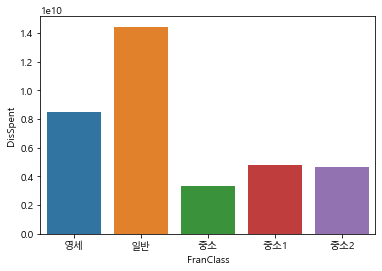

In [13]:
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.barplot(x='FranClass',y='DisSpent',data=df_FranClass_Spent) 
plt.show()

# 영세보다 일반(대형)에서 재난지원금 소비가 가장 크다. (절대적 금액)

In [14]:
df_FranClass_Spent['percent']=df_FranClass_Spent.DisSpent / df_FranClass_Spent.TotalSpent * 100

In [15]:
df_FranClass_Spent # 그러나 비율은 영세가 우수한 편

TotalSpent     DisSpent FranClass   percent
FranClass                                               
영세         156714863738   8481179470        영세  5.411854
일반         301279415845  14423786893        일반  4.787512
중소          69361984579   3361499475        중소  4.846314
중소1         87683013869   4803903973       중소1  5.478717
중소2         85386732430   4663286836       중소2  5.461372

### 규모별 업종 구성비
- 영세업체는 30%가 식당(한식, 양식)
- 한식식당은 규모 막론하고 상업의 대부분을 차지
- 편의점이 규모가 큰(중소 이상의) 업체를 많이 구성한다.
- 대규모(중소2, 일반)의 구성비가 비교적 고른 편으로, 주유소가 등장하며 편의점, 식당 등이 강세

In [16]:
df_FranClass_Type = pd.DataFrame(df_new.groupby(['FranClass','Type']).count()['OBJECTID']).reset_index()

In [32]:
df_FranClass_Type.columns = ['FranClass', 'Type', 'Count']

In [42]:
df_FranClass_Type['Percentage']=0

In [28]:
sum_lst = []

for col in df_FranClass_Type.FranClass.unique():
    sum_lst.append(df_FranClass_Type.Count[df_FranClass_Type.FranClass==col].sum())

In [39]:
sum_lst

[79862, 136904, 140999, 122327, 639337]

In [43]:
for i in range(0, len(df_FranClass_Type)):
    if df_FranClass_Type.iloc[i,0]==df_FranClass_Type.FranClass.unique()[0]:
        df_FranClass_Type.iloc[i,3]=df_FranClass_Type.iloc[i,2]/sum_lst[0]
    elif df_FranClass_Type.iloc[i,0]==df_FranClass_Type.FranClass.unique()[1]:
        df_FranClass_Type.iloc[i,3]=df_FranClass_Type.iloc[i,2]/sum_lst[1]
    elif df_FranClass_Type.iloc[i,0]==df_FranClass_Type.FranClass.unique()[2]:
        df_FranClass_Type.iloc[i,3]=df_FranClass_Type.iloc[i,2]/sum_lst[2]
    elif df_FranClass_Type.iloc[i,0]==df_FranClass_Type.FranClass.unique()[3]:
        df_FranClass_Type.iloc[i,3]=df_FranClass_Type.iloc[i,2]/sum_lst[3]
    elif df_FranClass_Type.iloc[i,0]==df_FranClass_Type.FranClass.unique()[4]:
        df_FranClass_Type.iloc[i,3]=df_FranClass_Type.iloc[i,2]/sum_lst[4]
    elif df_FranClass_Type.iloc[i,0]==df_FranClass_Type.FranClass.unique()[5]:
        df_FranClass_Type.iloc[i,3]=df_FranClass_Type.iloc[i,2]/sum_lst[5]

In [47]:
df_FranClass_Type.sort_values(by=['FranClass','Percentage'],ascending=False, inplace=True)

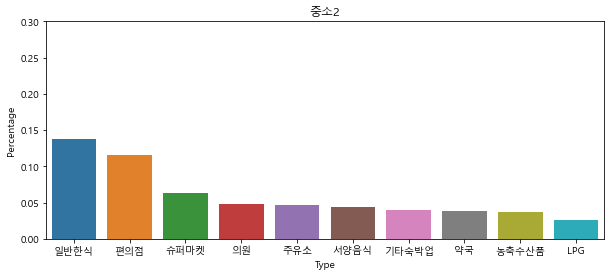

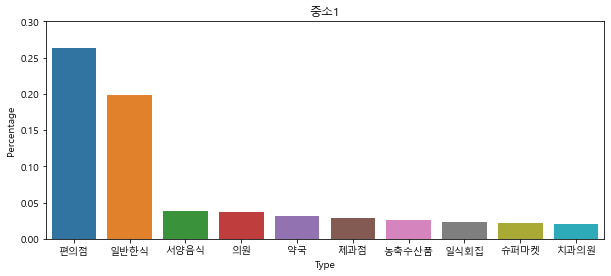

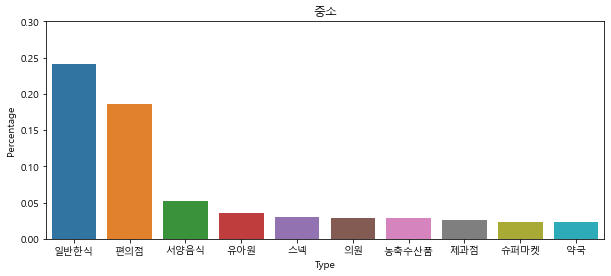

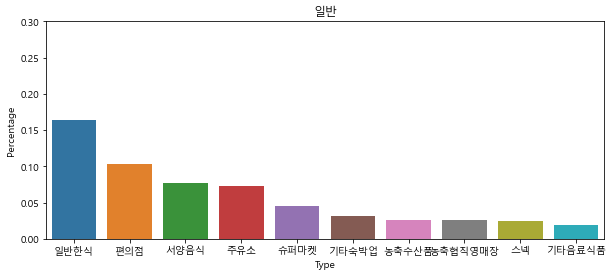

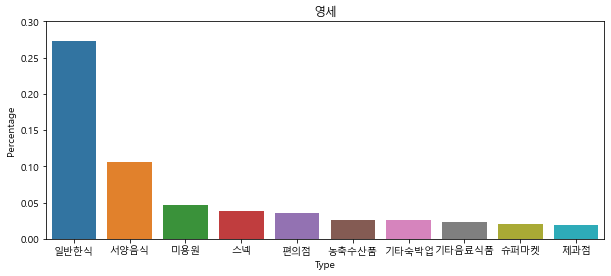

In [56]:
for col in df_FranClass_Type.FranClass.unique():
    data = df_FranClass_Type[df_FranClass_Type.FranClass==col].head(10)
    plt.figure(figsize=(10,4))
    sns.barplot(x='Type', y='Percentage', data=data)
    plt.title(col)
    plt.ylim(0,0.30)
    plt.show()

### 시간대별 규모별 소비

In [18]:
df_DayNight_Spent = df_new.groupby(['DayNight','FranClass']).sum()[['TotalSpent', 'DisSpent']].reset_index()

In [ ]:
df_DayNight_Spent.sort_values(by='FranClass')

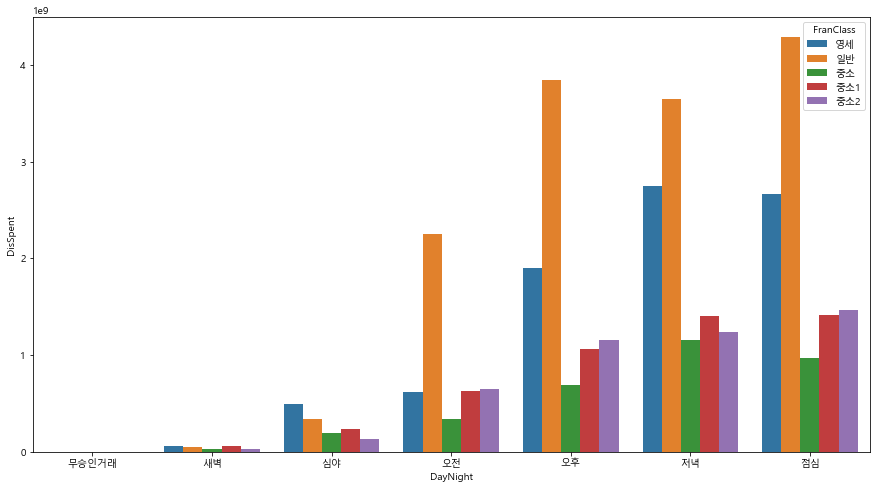

In [19]:
plt.figure(figsize=(15,8))
sns.barplot(x='DayNight',y='DisSpent',data=df_DayNight_Spent, hue='FranClass')
plt.show()

### 확진자 데이터(서비스키 승인중)

In [20]:
from urllib.request import Request, urlopen
from urllib.parse import urlencode, unquote, quote_plus
import json
import xmltodict

In [21]:
ServiceKey = '0U7SMSpqxpjza1zBTutpoHD19XceuRABZlnCCNAeLKIXiJyFA2D%2BWS3IlAmQ%2FPB7Y0MTvE0Qwml5zywvRkpNaA%3D%3D'
url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson'

queryParams = '?' + urlencode({
                            quote_plus('ServiceKey') : ServiceKey
                            })
request = Request(url+unquote(queryParams))
request.get_method = lambda: 'GET'
response_body = urlopen(request).read()

json_string = json.dumps(xmltodict.parse(response_body),indent=4)

In [22]:
json_string

'{\n    "response": {\n        "header": {\n            "resultCode": "99",\n            "resultMsg": "SERVICE KEY IS NOT REGISTERED ERROR."\n        }\n    }\n}'

In [23]:
df = pd.DataFrame.from_dict(json.loads(json_string)['response']['body']['items']['item'])

KeyError: 'body'

### 월별 총 소비 및 재난지원금 소비 추이

- 소비금액, 소비추이는 비슷
- 재난지원금이 5월 경에 지급됨에 따라 초기 소비금액/빈도 높음
- 재난지원금 소비가 줄어듬에도 불구하고 7, 8월 휴가철에 접어들면서 총 소비금액이 약간 증가: 휴가
- 누적확진자 동향은 대략적으로 5~7월에 완만하게 증가하다가 8월에 다소 급증

In [24]:
df_YM_Spent = df_new.groupby('YM').sum()[['TotalSpent','DisSpent','NumofSpent','NumofDisSpent']].reset_index()

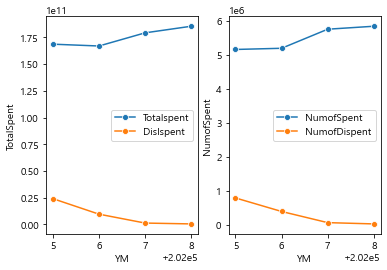

In [26]:
f, ax = plt.subplots(1,2)

sns.lineplot(x='YM', y='TotalSpent',data=df_YM_Spent,marker='o',label='Totalspent', ax=ax[0])
sns.lineplot(x='YM', y='DisSpent',data=df_YM_Spent,marker='o',label='Dislspent', ax=ax[0])
sns.lineplot(x='YM', y='NumofSpent',data=df_YM_Spent,marker='o',label='NumofSpent', ax=ax[1])
sns.lineplot(x='YM', y='NumofDisSpent',data=df_YM_Spent,marker='o',label='NumofDispent', ax=ax[1])

plt.show()